# Приоритизация гипотез и анализ A/B-теста

В нашем распоряжении данные крупного интернет-магазина.  
  
Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.  

**Цель проекта**
1) Приоритизировать гипотезы;  
  
2) Запустить A/B-тест и проанализировать результаты.  
   - Установить есть ли различия в среднем количестве заказов на посетителя между группами A и B.  
   - Установить есть ли различия в среднем чеке заказа между группами A и B.  
  
**Описание данных**  
  
Файл hypothesis.csv, содержащий следующие данные:  
-	Hypothesis — краткое описание гипотезы;
-	Reach — охват пользователей по 10-балльной шкале;
-	Impact — влияние на пользователей по 10-балльной шкале;
-	Confidence — уверенность в гипотезе по 10-балльной шкале;
-	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
  
Файлы с результатами A/B-теста:  
1) Файл orders.csv, содержащий следующие данные:
-	transactionId — идентификатор заказа;
-	visitorId — идентификатор пользователя, совершившего заказ;
-	date — дата, когда был совершён заказ;
-	revenue — выручка заказа;
-	group — группа A/B-теста, в которую попал заказ.
  
2) Файл visitors.csv, содержащий следующие данные:
-	date — дата;
-	group — группа A/B-теста;
-	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth = 110

## Приоритизация гипотез.

### Считаем CSV-файл с данными с помощью библиотеки pandas и сохраним его в датафрейм hypothesis.

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

### Изучим общую информацию о полученном датафрейме.

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Всего 9 гипотез. В названии столбцов есть прописные буквы. Пропущенных значений нет.

Выведем основную информацию о датафрейме с помощью метода info()

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных соответствуют ожидаемым.

### Заменим в названиях столбцов прописные буквы строчными.

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ice'] = hypothesis['ice'].round(2)
print(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Наиболее перспективные гипотезы по ICE:
1) 8 - Запустить акцию, дающую скидку на товар в день рождения  
2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
3) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
5) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Наиболее перспективные гипотезы по RICE: 
1) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
2) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
3) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
5) 8 - Запустить акцию, дающую скидку на товар в день рождения  

### Проанализируем, как изменилась приоритизация гипотез при применении RICE вместо ICE.

5 самых перспективных гипотез по ICE и RICE совпадают, однако по приоритету расположены они в разных последовательностях.  
  
При применении ICE:  
1) 8 - Запустить акцию, дающую скидку на товар в день рождения

2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

3) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

5) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

При применении RICE:  
1) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

3) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

5) 8 - Запустить акцию, дающую скидку на товар в день рождения

Самая перспективная гипотеза по ICE 8 (Запустить акцию, дающую скидку на товар в день рождения), но так как она затрагивает не большую долю пользователей (параметр Reach равен 1), то при применении RICE она опустилась на 5 место.  
  
Зато на первом месте стала гипотеза 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). Данная гипотеза имеет самый высокий параметр Reach (10), то есть она затронет сразу всех пользователей.  
  
Изменения в приоритизации произошли, потому что параметр Reach (как много пользователей затронет гипотеза) оказывает прямое воздействие на приоритет гипотезы при применении RICE вместо ICE.

### Вывод:  
- Всего в файле hypothesis.csv содержатся параметры 9 гипотез;
- В названии столбцов прописные буквы заменены строчными;
- Пропущенных значений нет;
- При применении фреймворка ICE для приоритизации гипотез составлен список из 5 самых перспективных гипотез:  
    1) 8 - Запустить акцию, дающую скидку на товар в день рождения  
    2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
    3) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
    4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
    5) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
- При применении фреймворка RICE для приоритизации гипотез составлен список из 5 самых перспективных гипотез:  
    1) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
    2) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
    3) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
    4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
    5) 8 - Запустить акцию, дающую скидку на товар в день рождения

## Анализ A/B-теста

### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы orders и visitors.

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Изучим общую информацию о датафрейме orders.

In [10]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Всего 1197 строк и 5 столбцов. В названии столбцов присутствуют прописные буквы. Заменим их на строчные. Тип данных в столбце date заменим на datetime.

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


### Проверим на наличие дубликатов и пропущенных значений.

In [14]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [15]:
orders.duplicated().sum()

0

Дубликаты и пропущенные значения не установлены.

In [16]:
orders['transaction_id'].duplicated().sum()

0

Дубликатов в идентификаторах заказа нет.

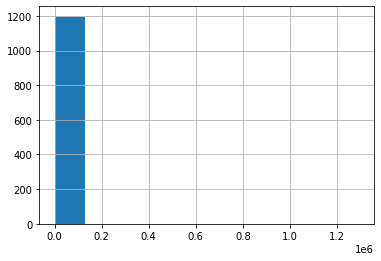

In [17]:
orders['revenue'].hist();

Практически все значения выручки лежат в одном диапазоне до 100 000

In [18]:
print(orders['date'].min(), orders['date'].max())

2019-08-01 00:00:00 2019-08-31 00:00:00


Даты заказов в диапазоне одного месяца - августа 2019.

In [19]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Всего 2 группы: А и В

In [20]:
len(orders['visitor_id'].unique())

1031

Всего 1031 уникальный пользователь.

При группировке по столбцам visitor_id и group, установлено, что пользователь 8300375 отражен и в группе А и в группе В.

In [21]:
orders.groupby(['visitor_id', 'group']).agg({'transaction_id':'count'})

transaction_id
visitor_id group                
5114589    B                   1
6958315    B                   1
8300375    A                   1
           B                   1
11685486   A                   1
...                          ...
4266935830 B                   1
4278982564 A                   1
4279090005 B                   1
4281247801 B                   1
4283872382 B                   1

[1089 rows x 1 columns]

Так как в сгруппированном датафрейме всего 1089 строк, а уникальных пользователей 1031, то такой пользователь (который входит в обе группы одновременно) не один. Найдем всех таких пользователей.

In [22]:
#уникальные пользователи группы А
a = orders.query('group == "A"')['visitor_id'].unique()

#уникальные пользователи группы В
b = orders.query('group == "B"')['visitor_id'].unique()

#пользователи, которые входят в обе группы
a_b = list(set(a).intersection(b))

#сводная таблица по выбранным пользователям
orders.query('visitor_id == @a_b').pivot_table(index='visitor_id', columns='group', values='revenue')

group,A,B
visitor_id,,
8300375,1790.000000,10510.000000
199603092,4923.000000,3488.000000
232979603,60.000000,2640.000000
237748145,797.500000,7620.000000
276558944,5050.000000,12350.000000
351125977,4485.000000,15185.000000
393266494,21550.000000,16870.000000
457167155,1620.000000,2745.666667
471551937,22950.000000,3460.000000


In [23]:
len(a_b)

58

Целых 58 пользователй входят и в группу А и в группу В одновременно. Для А/В теста такое не допустимо. Посмотрим какую долю от всех пользователей занимают пользователи входящие в обе группы и какую долю от общей выручки составляют их заказы.

In [24]:
 100 * orders.query('visitor_id == @a_b')['revenue'].sum() / orders['revenue'].sum()

15.600952428320943

In [25]:
100 * len(orders.query('visitor_id == @a_b')['transaction_id']) / len(orders['transaction_id'])

15.121136173767752

15.6% доля выручки от заказов странных пользователей в общей выручке и 15.1% доля таких пользователей в общем количестве. Значения слишком большие, чтобы просто удалить данные с этими пользователями. Их наличие вообще ставит под сомнение адекватность проведенного эксперимента. Или адекватность представленных данных по нему.  
В конце исследования посчитаем статистическую значимость различий в среднем чеке заказа и в среднем количестве заказов на посетителя между группами по данным без этих пользователей.

### Изучим общую информацию о датафрейме visitors.

In [26]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [27]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Всего 62 строки и 3 столбца. Тип данных в столбце date заменим на datetime.

In [28]:
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим наличие пропущенных значений и дубликатов.

In [29]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [30]:
visitors.duplicated().sum()

0

Пропущенных значений и дубликатов не установлено.

In [31]:
print(visitors['date'].min(), visitors['date'].max())

2019-08-01 00:00:00 2019-08-31 00:00:00


Диапазон дат также как и в orders в пределах 1 месяца - август 2019.

In [32]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Также 2 группы А и В.

### Построим график кумулятивной выручки по группам.

In [33]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data.columns = [
    'date',
    'group',
    'transactions',
    'buyers',
    'revenue',
    'visitors',
]
 
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'transactions']]

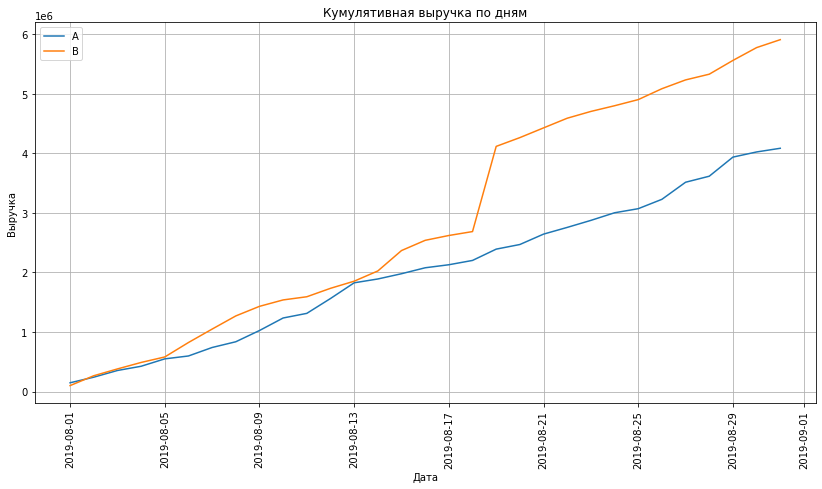

In [34]:
plt.figure(figsize=(14, 7))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
    
# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
    
plt.legend()
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по дням')
plt.xticks(rotation='vertical');

Кумулятивная выручка группы В практически всегда больше, чем группы А. С 1 по 5 августа они шли вровень, затем выручка группы В стала больше. 13 августа выручки снова сравнялись, затем уже в группе В выручка стабильно выше. С 20 августа и до конца эксперимента различие составляет около 2 000 000.  
Резкий скачок кумулятивной выручки в группе В 19 августа может быть связан аномально большими по сумме заказами в этот день.

### Построим график кумулятивного среднего чека по группам.

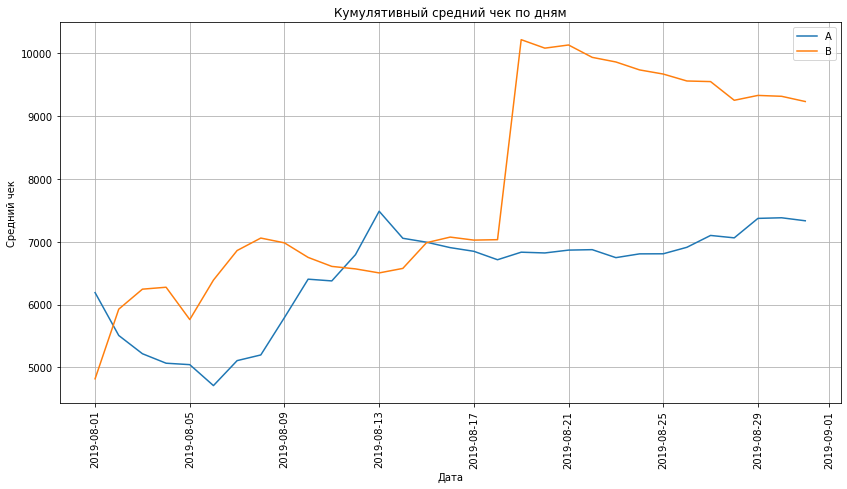

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue']/cumulative_revenue_a['transactions'], 
         label='A')
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue']/cumulative_revenue_b['transactions'], 
         label='B')
plt.legend()
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по дням')
plt.xticks(rotation='vertical');

Средний чек группы В почти все время выше. За исключением первого дня и периода с 12 по 15 августа. Вероятно в этот период в группе А были заказы на крупные суммы.  
Также виден резкий скачок среднего чека в группе В 19 августа, что также вероятно связано с аномально большим по стоимости заказом.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

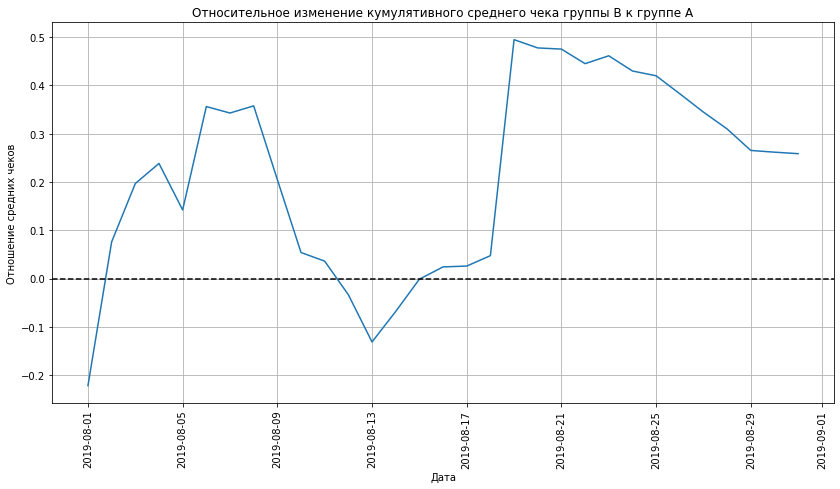

In [36]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# cтроим отношение средних чеков
plt.figure(figsize=(14, 7))

plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_b']/
          merged_cumulative_revenue['transactions_b'])/
         (merged_cumulative_revenue['revenue_a']/
         merged_cumulative_revenue['transactions_a'])-1
        )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation='vertical');

На графике также видно, что средний чек группы В почти все время выше чем группы А. За исключением первого дня и периода с 12 по 15 августа.

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

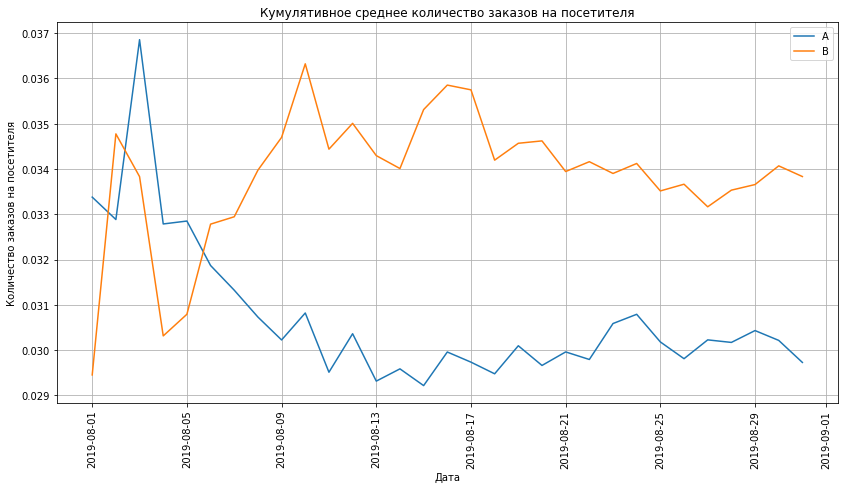

In [37]:
# считаем кумулятивное среднее количества заказов на посетителя
cumulative_data['tr_per_visitor'] = (
    cumulative_data['transactions'] / cumulative_data['visitors']
)

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(14, 7))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['tr_per_visitor'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['tr_per_visitor'], label='B')
plt.legend()
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Количество заказов на посетителя')
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xticks(rotation='vertical');

Конверсия пользователей группы В с 6 августа стабильно опережает конверсию пользователей группы А

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

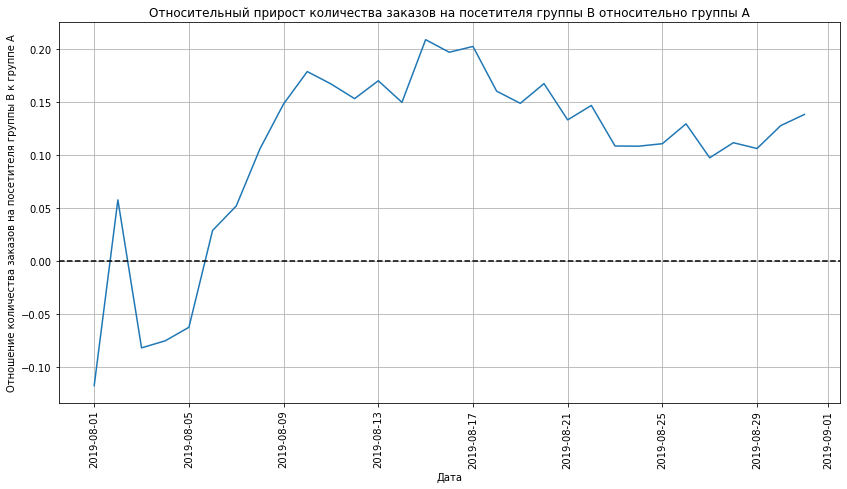

In [38]:
merged_cumulative_tr_per_visitor = (
    cumulative_data_a[['date','tr_per_visitor']].merge(
        cumulative_data_b[['date','tr_per_visitor']], 
          left_on='date', right_on='date', how='left', suffixes=['_a', '_b']
        )
)

plt.figure(figsize=(14, 7))

plt.plot(
    merged_cumulative_tr_per_visitor['date'],
    merged_cumulative_tr_per_visitor['tr_per_visitor_b'] / merged_cumulative_tr_per_visitor['tr_per_visitor_a']-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Отношение количества заказов на посетителя группы В к группе А')
plt.title('Относительный прирост количества заказов на посетителя группы B относительно группы A')
plt.xticks(rotation='vertical');

До 6 августа отношение количества заказов на посетителя групп колебалось. Начиная с 6 августа количество заказов на посетителя в группе В всегда больше, чем в группе А. Необходимо проанализировать аномалии.

###	Построим точечный график количества заказов по пользователям.

Text(0.5, 1.0, 'Количество заказов по пользователям')

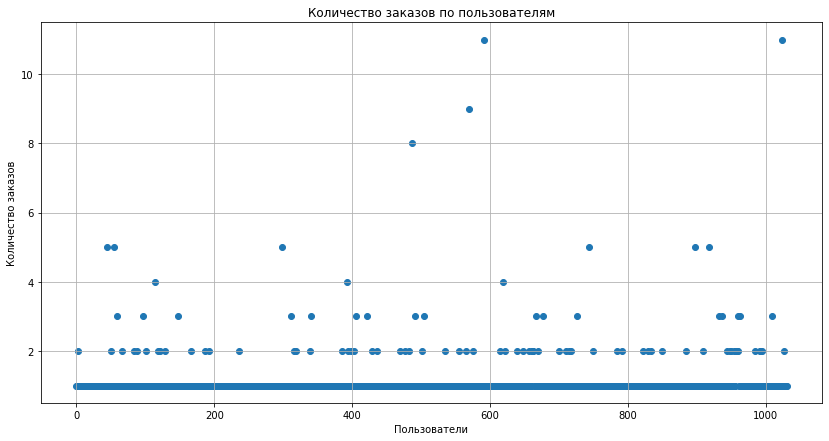

In [39]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'transactions']

x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(14, 7))
plt.scatter(x_values, orders_by_users['transactions']) 
plt.grid(True)
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')

Много пользователей с 1-2 заказами. С 3 заказами уже значительно меньше, а с 4 и более единичные случаи.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [40]:
np.percentile(orders_by_users['transactions'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказa. И 10% пользователей заказывали более 1 разa. 
Выберем 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.

### Построим точечный график стоимостей заказов.

Text(0.5, 1.0, 'Стоимость заказов по пользователям')

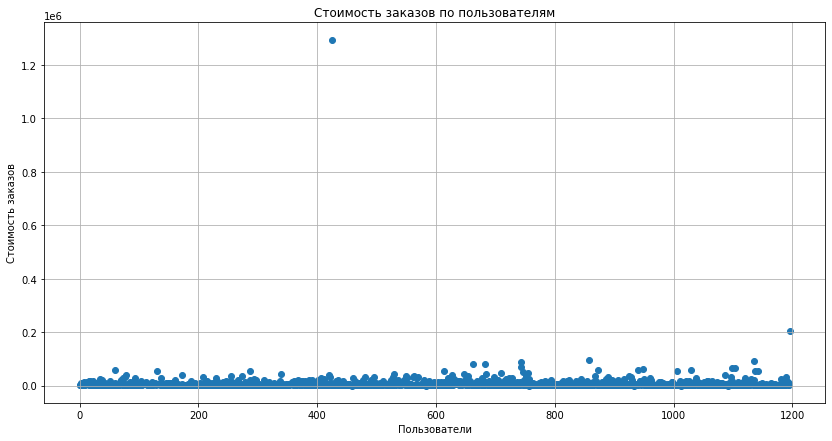

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(14, 7))
plt.scatter(x_values, orders['revenue'])
plt.grid(True)
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title('Стоимость заказов по пользователям')

Стоимость практически всех заказов лежит в диапазоне до 100 000. Есть один заказ стоимостью 200 000 и один стоимостью 1 300 000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.

In [42]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233. Примем за аномальных пользователей тех, кто совершил заказ дороже 40 000 рублей.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы.  
Нулевая: различий в среднем количестве заказов между группами нет.  
Альтернативная: различия в среднем количестве заказов между группами есть.  
Для проверки гипотезы используем критерий U-критерий Манна-Уитни.  

In [43]:
#пользователи по дням в группе А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

#количество пользователей в выбранную дату в группе A
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

#пользователи по дням в группе В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

#количество пользователей в выбранную дату в группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

#количество заказов и суммарная выручка в выбранную дату в группе A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'transactions_per_date_a', 'revenue_per_date_a']

#суммарное количество заказов и суммарная выручка до выбранной даты включительно в группе А
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'transactions_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_a_cummulative.columns = [
    'date',
    'transactions_cummulative_a',
    'revenue_cummulative_a',
]

#количество заказов и суммарная выручка в выбранную дату в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

orders_b_daily.columns = [
    'date', 
    'transactions_per_date_b', 
    'revenue_per_date_b'
]

#суммарное количество заказов и суммарная выручка до выбранной даты включительно в группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'transactions_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_b_cummulative.columns = [
    'date',
    'transactions_cummulative_b',
    'revenue_cummulative_b',
]

#объединенная таблица
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,transactions_per_date_a,revenue_per_date_a,transactions_per_date_b,revenue_per_date_b,transactions_cummulative_a,revenue_cummulative_a,transactions_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [44]:
#число совершённых заказов для пользователей группы А, которые заказывали хотя бы 1 раз 
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'transactions']

#число совершённых заказов для пользователей группы В, которые заказывали хотя бы 1 раз 
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'transactions']

#количество заказов пользователей группы А
sample_a = pd.concat(
    [
        orders_by_users_a['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

#количество заказов пользователей группы В
sample_b = pd.concat(
    [
        orders_by_users_b['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)
#передадим критерию mannwhitneyu() данные о количестве заказов по группам
p_value = stats.mannwhitneyu(sample_a, sample_b)[1]

alpha = 0.05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, p-value = {0:.3f} < alpha = 0.05'.format(p_value))
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-value = {0:.3f} > alpha = 0.05'.format(p_value))


#относительный прирост среднего числа заказов группы B
print(
    "Относительный прирост среднего количества заказов группы B = {0:.3f}".format(
        sample_b.mean() / sample_a.mean() - 1
    )
)

Отвергаем нулевую гипотезу, p-value = 0.017 < alpha = 0.05
Относительный прирост среднего количества заказов группы B = 0.138


По «сырым» данным есть различия в среднем числе заказов групп A и B.   
p-value 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.  
Относительный выигрыш группы B равен 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы.  
Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть.  
Для проверки гипотезы используем критерий U-критерий Манна-Уитни.  
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами

In [45]:
p_value = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, p-value = {0:.3f} < alpha = 0.05'.format(p_value))
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-value = {0:.3f} > alpha = 0.05'.format(p_value))

print(
    'Относительный прирост среднего чека группы B = {0:.3f}'.format(
        orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
    )
) 

Не получилось отвергнуть нулевую гипотезу, p-value = 0.729 > alpha = 0.05
Относительный прирост среднего чека группы B = 0.259


P-value 0.729 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
Средний чек группы B выше среднего чека группы A (относительная разница 26%).  
Хоть разница в среднем чеке в 26%, статистически значимой она не является. Отвергнуть нулевую гипотезу о равенстве средних чеков не удалось.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

95-й и 99-й перцентили средних чеков равны 28000 и 58233.2. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 40 000 рублей.

In [46]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['transactions'] > 3]['visitor_id'],
        orders_by_users_b[orders_by_users_b['transactions'] > 3]['visitor_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > 40000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_users

1099     148427295
18       199603092
23       237748145
684      358944393
648      382846391
1137     759473111
339      834731816
949      887908475
744      888512513
709      950626008
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
287     2254456485
131     2254586615
1006    2261934787
755     2279926127
269     2378935119
278     2458001652
1142    2606908679
530     2912540959
424     3062433592
78      3288820196
746     3321013705
501     3717692402
514     3803269165
613     3931967268
940     4003628586
743     4133034833
499     4256040402
662     4266935830
Name: visitor_id, dtype: int64

In [47]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
) 


In [54]:
sample_b_filtered.value_counts()

0    18330
1      501
2       16
3        2
Name: transactions, dtype: int64

Формулировки гипотез те же:  
Нулевая: различий в среднем количестве заказов между группами нет.  
Альтернативная: различия в среднем  количестве заказов между группами есть.    
Применим статистический критерий Манна-Уитни к полученным выборкам

In [49]:
p_value = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, p-value = {0:.3f} < alpha = 0.05'.format(p_value))
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-value = {0:.3f} > alpha = 0.05'.format(p_value))


print(
    'Относительный прирост среднего количества заказов группы B = {0:.3f}'.format(
        sample_b_filtered.mean()/sample_a_filtered.mean()-1
    )
) 

Отвергаем нулевую гипотезу, p-value = 0.009 < alpha = 0.05
Относительный прирост среднего количества заказов группы B = 0.164


По «очищенным» от аномалий данным также есть различия в среднем числе заказов групп A и B.   
p-value 0.009 (по «сырым» данным 0.017) также меньше 0.05.  
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.  
Относительный выигрыш группы B по «очищенным» данным равен 16.4% (по «сырым» данным - 13.8%).

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Формулировка гипотез та же:    
Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть.  
Для проверки гипотезы используем критерий U-критерий Манна-Уитни.    

In [50]:
p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, p-value = {0:.3f} < alpha = 0.05'.format(p_value))
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-value = {0:.3f} > alpha = 0.05'.format(p_value))

print(
    "Относительный прирост среднего чека группы B = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


Не получилось отвергнуть нулевую гипотезу, p-value = 0.711 > alpha = 0.05
Относительный прирост среднего чека группы B = 0.060


P-value по «очищенным» данным 0.711 (по «сырым» данным 0.729) также значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
Относительная разница в средних чеках группы B к группе A сократилась и стала по «очищенным данным 6%(по «сырым» данным относительная разница 26%).
На средний чек сильное влияние оказали аномальные по стоимости заказы.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «очищенным» от аномальных заказов данным (в том числе от заказов пользователей, входящих в группы А и В одновременно).

Формулировка гипотез та же:    
Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная гипотеза: различия в среднем количестве заказов на посетителя между группами есть.  
Для проверки гипотезы используем критерий U-критерий Манна-Уитни.   

In [51]:
#пользователи, входящие в группу А и группу В одновременно
users_a_b = pd.Series(a_b)

#все аномальные пользователи вместе
all_abnormal_users = (
    pd.concat([abnormal_users, users_a_b], axis=0)
    .drop_duplicates()
    .sort_values()
)

all_abnormal_users

42         8300375
1099     148427295
18       199603092
7        232979603
23       237748145
           ...    
6       4120364173
743     4133034833
48      4186807279
499     4256040402
662     4266935830
Length: 81, dtype: int64

Из общих данных исключим заказы 81 пользователя.

In [52]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(all_abnormal_users))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(all_abnormal_users))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
) 

p_value = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, p-value = {0:.3f} < alpha = 0.05'.format(p_value))
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-value = {0:.3f} > alpha = 0.05'.format(p_value))


print(
    'Относительный прирост среднего количества заказов группы B = {0:.3f}'.format(
        sample_b_filtered.mean()/sample_a_filtered.mean()-1
    )
) 

Отвергаем нулевую гипотезу, p-value = 0.006 < alpha = 0.05
Относительный прирост среднего количества заказов группы B = 0.178


p-value уменьшилось до 0.006 (было 0.009 по «очищенным» от аномальных заказов данным и 0.017 по «сырым» данным).  
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, по прежнему отвергаем.  
Относительный выигрыш группы B стал 17.8% (был 16.4% по «очищенным» данным и 13.8% по «сырым» данным). 
Таким образом, наличие в данных пользователей, входящих одновременно в обе группы на результат эксперимента значительно не повлияло. По прежнему видно преимущество в среднем числе заказов группы В над группой А.

Формулировка гипотез та же:    
Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть.  
Для проверки гипотезы используем критерий U-критерий Манна-Уитни.  

In [53]:
p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(all_abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(all_abnormal_users)),
                )
            ]['revenue'],
        )[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, p-value = {0:.3f} < alpha = 0.05'.format(p_value))
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-value = {0:.3f} > alpha = 0.05'.format(p_value))
    
print(
    "Относительный прирост среднего чека группы B = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(all_abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(all_abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Не получилось отвергнуть нулевую гипотезу, p-value = 0.831 > alpha = 0.05
Относительный прирост среднего чека группы B = 0.051


P-value увеличилось до 0.831 (было 0.711 по «очищенным» данным, 0.729 по «сырым» данным), то есть по прежнему значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
Относительная разница в средних чеках группы B к группе A сократилась и стала 5.1% (по «очищенным данным 6%, по «сырым» данным 26%).  
Таким образом, наличие в данных пользователей, входящих одновременно в обе группы на средний чек значительно не повлияло.  Разница в 5.1 % в среднем чеке статистически значимой по прежнему не является.

###	Примем решение по результатам теста.

Варианты решений:  
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.

По результатам A/B-теста установлено следующее:  
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Статистически значимого различия по среднему чеку между группами нет как по сырым данным, так и после фильтрации аномалий.
- Конверсия группы В стабильно выше конверсии группы А.
- Средний чек колебался, но это была связвно с аномальными заказами.  

Таким образом, в случае принятия данных достоверными, тест можно признать успешным и перейти к проверке следующей гипотезы.  

При признании данных недостоверными (ошибка при проведении A/B-теста или при сборе результатов) из-за наличия 15% пользователей в обеих группах, тест необходимо провести заново. Наличие пользователя в обеих группах недопустимо. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно. Даже исключение таких пользователей из результата теста не может гарантировать, что все остальные данные были собраны корректно.

## Общий вывод

Проведен анализ данных крупного интернет-магазина (списка гипотез и результатов A/B-теста).

**1) Приоритизация гипотез**
- Всего в файле hypothesis.csv содержатся параметры 9 гипотез (Reach, Impact, Confidence и Efforts);
- В названии столбцов прописные буквы заменены строчными;
- Пропущенных значений в данных нет;
- При применении фреймворка ICE для приоритизации гипотез составлен список из 5 самых перспективных гипотез:  
    1) 8 - Запустить акцию, дающую скидку на товар в день рождения  
    2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
    3) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
    4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
    5) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
- При применении фреймворка RICE для приоритизации гипотез составлен список из 5 самых перспективных гипотез:  
    1) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
    2) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
    3) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
    4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
    5) 8 - Запустить акцию, дающую скидку на товар в день рождения
    
**2) Анализ A/B-теста**
- Проведена предобработка и исследовательский аналих данных orders.csv и visitors.csv:
  - Всего в файле orders.csv 1197 строк и 5 столбцов (transactionId, visitorId, date, revenue и group). 
  - В названии столбцов присутствуют прописные буквы. Заменены строчными.
  - Тип данных в столбце date заменен на datetime.
  - Дубликаты и пропущенные значения не установлены.
  - Установлено, что 58 пользователй входят и в группу А и в группу В одновременно.
  - Всего в файле visitors.csv 62 строки и 3 столбца (date, group и visitors).
  - Тип данных в столбце date заменен на datetime.
  - Пропущенных значений и дубликатов не установлено.
- Тестирование проводилось на протяжении 1 месяца (с 1 по 31 августа 2019). Всего за время теста было сделано 1197 заказов от 1031 уникального пользователя. Изучены результаты проведенного A/B-теста:
  - Кумулятивная выручка группы В практически всегда больше, чем группы А. С 1 по 5 августа они шли вровень, затем выручка группы В стала больше. 13 августа выручки снова сравнялись, затем уже в группе В выручка стабильно выше. С 20 августа и до конца эксперимента различие составляет около 2 000 000.
  - Средний чек группы В почти все время выше. За исключением первого дня и периода с 12 по 15 августа. Вероятно в этот период в группе А были заказы на крупные суммы.
  - Конверсия пользователей группы В с 6 августа стабильно опережает конверсию пользователей группы А.
- За аномальных пользователей приняты те, кто совершил от 3 заказов или совершил заказ дороже 40 000 рублей.
- По «сырым» и очищенным данным есть различия в среднем числе заказов групп A и B. Относительный выигрыш группы B равен 13.8% по «сырым» данным и 16.4% по «очищенным» данным.
- По «сырым» и очищенным данным статистически значимого различия в средних чеках в группах A и B нет. Относительная разница в средних чеках группы B к группе A по «очищенным данным 6%, по «сырым» данным 26%.
- Наличие в данных пользователей, входящих одновременно в группы А и В на средний чек и среднее число заказов значительно не повлияло.

Таким образом, A/B-тест можно признать успешным и перейти к проверке следующей гипотезы.  